## Model Training & Developement

In [96]:
import pandas as pd
import numpy as np 

In [170]:
train_df = pd.read_csv('../data/processed/final_s2_train_data.csv', index_col = 0)

In [172]:
train_df.head()

,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,...,CorrectHDate,TDays,tif_path,NDVI,EVI,NDWI,GNDVI,SAVI,MSAVI,MoistureIndex
0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-25,2024-04-14,97,54,...,2024-04-14,141,gee_downloads/20240412T050649_20240412T051727_...,0.105,1.546,-0.132,0.132,0.158,0.188,0.077
1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-13,2024-04-26,82,58,...,2024-04-26,165,gee_downloads/20240425T051649_20240425T052817_...,0.198,0.188,-0.197,0.197,0.296,0.330,-0.005
2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-12-19,2024-04-28,92,91,...,2024-04-28,131,gee_downloads/20240427T050651_20240427T051439_...,0.220,-3.043,-0.220,0.220,0.329,0.360,-0.008
3,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-12-12,2024-05-19,94,55,...,2024-05-19,159,gee_downloads/20240517T050651_20240517T051655_...,0.208,-0.951,-0.189,0.189,0.311,0.344,-0.078
4,1326580,Pests,Paddy,Telangana,Medak,Kulcharam,2023-12-13,2024-05-18,97,51,...,2024-05-18,157,gee_downloads/20240517T050651_20240517T051655_...,0.174,-2.009,-0.172,0.172,0.261,0.296,-0.031


In [174]:
train_df.columns

Index(['FarmID', 'category', 'Crop', 'State', 'District', 'Sub-District',
       'SDate', 'HDate', 'CropCoveredArea', 'CHeight', 'CNext', 'CLast',
       'CTransp', 'IrriType', 'IrriSource', 'IrriCount', 'WaterCov',
       'ExpYield', 'Season', 'geometry', 'CorrectSDate', 'CorrectHDate',
       'TDays', 'tif_path', 'NDVI', 'EVI', 'NDWI', 'GNDVI', 'SAVI', 'MSAVI',
       'MoistureIndex'],
      dtype='object')

In [176]:
to_drop = ['FarmID', 'State', 'District', 'Sub-District',  'SDate', 'HDate',
          'geometry', 'CorrectSDate', 'CorrectHDate', 'tif_path', 'EVI']

In [178]:
train = train_df.drop(columns=to_drop)

In [180]:
train.head()

,category,Crop,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,TDays,NDVI,NDWI,GNDVI,SAVI,MSAVI,MoistureIndex
0,Healthy,Paddy,97,54,Pea,Lentil,Transplanting,Flood,Groundwater,4,87,17,Rabi,141,0.105,-0.132,0.132,0.158,0.188,0.077
1,Healthy,Paddy,82,58,Pea,Lentil,Transplanting,Flood,Canal,5,94,15,Rabi,165,0.198,-0.197,0.197,0.296,0.330,-0.005
2,Healthy,Paddy,92,91,Pea,Lentil,Transplanting,Flood,Canal,3,99,20,Rabi,131,0.220,-0.220,0.220,0.329,0.360,-0.008
3,Diseased,Paddy,94,55,Pea,Lentil,Transplanting,Flood,Canal,5,97,20,Rabi,159,0.208,-0.189,0.189,0.311,0.344,-0.078
4,Pests,Paddy,97,51,Pea,Lentil,Transplanting,Flood,Groundwater,5,85,15,Rabi,157,0.174,-0.172,0.172,0.261,0.296,-0.031


In [182]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7073 entries, 0 to 7079
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         7073 non-null   object 
 1   Crop             7073 non-null   object 
 2   CropCoveredArea  7073 non-null   int64  
 3   CHeight          7073 non-null   int64  
 4   CNext            7073 non-null   object 
 5   CLast            7073 non-null   object 
 6   CTransp          7073 non-null   object 
 7   IrriType         7073 non-null   object 
 8   IrriSource       7073 non-null   object 
 9   IrriCount        7073 non-null   int64  
 10  WaterCov         7073 non-null   int64  
 11  ExpYield         7073 non-null   int64  
 12  Season           7073 non-null   object 
 13  TDays            7073 non-null   int64  
 14  NDVI             7073 non-null   float64
 15  NDWI             7073 non-null   float64
 16  GNDVI            7073 non-null   float64
 17  SAVI             70

In [184]:
category_mapper = {label: idx for idx, label in enumerate(train['category'].unique()) if pd.notna(label)}
category_mapper

{'Healthy': 0, 'Diseased': 1, 'Pests': 2, 'Stressed': 3}

In [186]:
train['target'] = train['category'].map(category_mapper)
# Drop the original 'category' column now that we have the 'target' column
train.drop(columns=['category'], inplace=True)
train.head()

,Crop,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,TDays,NDVI,NDWI,GNDVI,SAVI,MSAVI,MoistureIndex,target
0,Paddy,97,54,Pea,Lentil,Transplanting,Flood,Groundwater,4,87,17,Rabi,141,0.105,-0.132,0.132,0.158,0.188,0.077,0
1,Paddy,82,58,Pea,Lentil,Transplanting,Flood,Canal,5,94,15,Rabi,165,0.198,-0.197,0.197,0.296,0.330,-0.005,0
2,Paddy,92,91,Pea,Lentil,Transplanting,Flood,Canal,3,99,20,Rabi,131,0.220,-0.220,0.220,0.329,0.360,-0.008,0
3,Paddy,94,55,Pea,Lentil,Transplanting,Flood,Canal,5,97,20,Rabi,159,0.208,-0.189,0.189,0.311,0.344,-0.078,1
4,Paddy,97,51,Pea,Lentil,Transplanting,Flood,Groundwater,5,85,15,Rabi,157,0.174,-0.172,0.172,0.261,0.296,-0.031,2


### Category encoder

In [189]:
from lightgbm import LGBMClassifier
from shapely.affinity import scale, translate
from skimage import exposure
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder

In [191]:
# Identify categorical columns to encode
categorical_cols = train.select_dtypes(include=['object']).columns

# Apply Label Encoding for all categorical columns
for col in categorical_cols:
    encoder = LabelEncoder()
    train[col] = encoder.fit_transform(train[col])

In [193]:
pd.set_option('display.float_format', '{:.03f}'.format)
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop,7073.000,3.141,1.778,0.000,2.000,3.000,5.000,6.000
CropCoveredArea,7073.000,77.797,14.183,40.000,67.000,79.000,90.000,100.000
CHeight,7073.000,87.327,51.213,20.000,51.000,75.000,101.000,250.000
CNext,7073.000,4.459,3.083,0.000,1.000,4.000,7.000,9.000
CLast,7073.000,4.152,3.220,0.000,1.000,4.000,7.000,9.000
CTransp,7073.000,1.576,1.138,0.000,1.000,2.000,3.000,3.000
IrriType,7073.000,1.048,0.947,0.000,0.000,1.000,2.000,3.000
IrriSource,7073.000,0.789,0.784,0.000,0.000,1.000,1.000,4.000
IrriCount,7073.000,3.519,1.416,1.000,2.000,4.000,5.000,6.000
WaterCov,7073.000,56.870,23.124,20.000,40.000,51.000,82.000,100.000


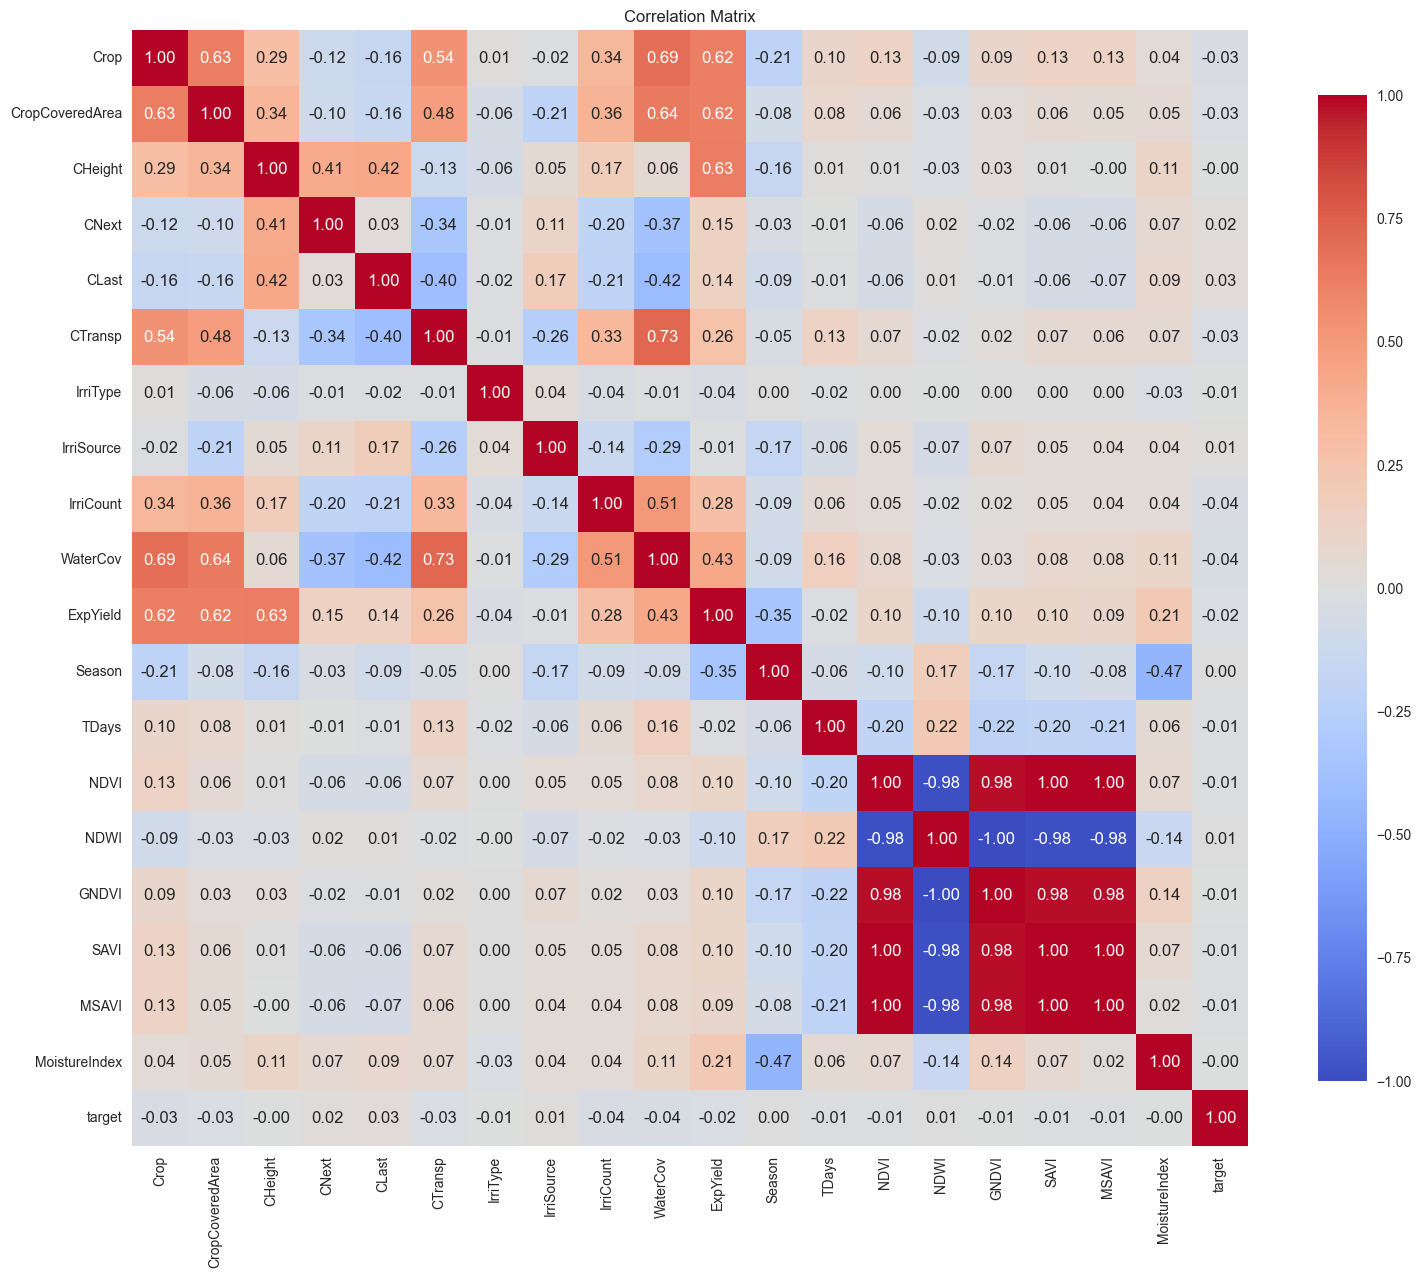

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
correlation_matrix = train.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## Model Training

In [198]:
# Separate features and target variable in the train set
X = train.drop(columns=['target'])
y = train['target'].astype(int)

In [200]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [202]:
X_train.head()

,Crop,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,TDays,NDVI,NDWI,GNDVI,SAVI,MSAVI,MoistureIndex
887,5,94,57,4,0,3,1,1,3,96,24,0,124,0.029,-0.055,0.055,0.044,0.057,0.277
6633,1,50,87,8,3,1,0,0,3,50,12,0,168,0.177,-0.207,0.207,0.266,0.300,0.157
3580,4,94,241,7,9,2,2,0,3,47,20,1,72,0.245,-0.259,0.259,0.368,0.390,0.097
4129,4,96,176,7,9,0,0,1,4,48,20,1,135,0.272,-0.281,0.281,0.408,0.423,0.076
6072,3,52,39,1,5,1,0,2,1,26,14,1,90,0.212,-0.206,0.206,0.318,0.348,-0.109


In [204]:
# Configuration dictionary for LightGBM parameters
config_dict = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': len(category_mapper),  # Number of classes in the target
    'num_leaves': 81,
    'learning_rate': 0.01,
    'n_estimators': 500,
    'random_state': 42,
    'force_row_wise': 'true'
}

# Initialize LightGBM classifier with config_dict parameters
model = LGBMClassifier(**config_dict)

# Fit the model with an evaluation set for early stopping and progress tracking
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
)

[LightGBM] [Info] Total Bins 2194
[LightGBM] [Info] Number of data points in the train set: 5658, number of used features: 19
[LightGBM] [Info] Start training from score -0.190841
[LightGBM] [Info] Start training from score -2.806015
[LightGBM] [Info] Start training from score -2.800184
[LightGBM] [Info] Start training from score -2.947094


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               force_row_wise='true', importance_type='split',
               learning_rate=0.01, max_depth=-1, metric='multi_logloss',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=None, num_class=4, num_leaves=81,
               objective='multiclass', random_state=42, reg_alpha=0.0,
               reg_lambda=0.0, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [206]:
# Predict on the validation set
y_pred = model.predict(X_valid)

# Generate classification report and weighted F1 score
classification_rep = classification_report(y_valid, y_pred, target_names=list(category_mapper.keys()))
f1 = f1_score(y_valid, y_pred, average='weighted')

# Print model evaluation metrics
print("Classification Report:\n", classification_rep)
print("\nWeighted F1 Score:", f1)

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.83      1.00      0.90      1169
    Diseased       0.00      0.00      0.00        86
       Pests       0.00      0.00      0.00        86
    Stressed       0.00      0.00      0.00        74

    accuracy                           0.82      1415
   macro avg       0.21      0.25      0.23      1415
weighted avg       0.68      0.82      0.75      1415


Weighted F1 Score: 0.7464463742242509


## Class Balancing

In [209]:
from sklearn.ensemble import RandomForestClassifier

# class_weight='balanced' automatically uses the inverse of class frequencies
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [211]:
# Predict on the validation set
y_pred = rf_model.predict(X_valid)

# Generate classification report and weighted F1 score
classification_rep = classification_report(y_valid, y_pred, target_names=list(category_mapper.keys()))
f1 = f1_score(y_valid, y_pred, average='weighted')

# Print model evaluation metrics
print("Classification Report:\n", classification_rep)
print("\nWeighted F1 Score:", f1)

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.83      1.00      0.90      1169
    Diseased       0.50      0.01      0.02        86
       Pests       0.00      0.00      0.00        86
    Stressed       0.00      0.00      0.00        74

    accuracy                           0.83      1415
   macro avg       0.33      0.25      0.23      1415
weighted avg       0.71      0.83      0.75      1415


Weighted F1 Score: 0.7488184403477286


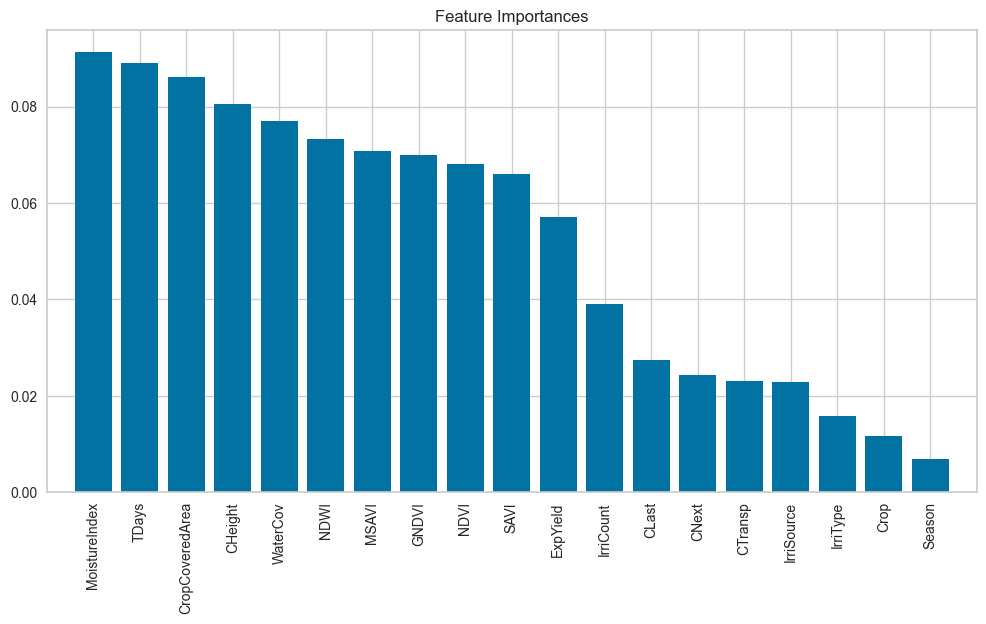

In [213]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [223]:
from lightgbm import LGBMClassifier

# Specify class weights manually, e.g., {Healthy: 1, Diseased: some weight, etc.}
weights = {
    'Healthy': 1.0,
    'Diseased': 10.0,
    'Pests': 10.0,
    'Stressed': 15.0
}

# Convert these into an array matching numeric labels
# e.g., if 'Healthy' is label 0, 'Diseased' is label 1, etc.
# The easiest approach is often to let LGBM handle it via 'is_unbalance=True'
# or provide class_weight directly if your data is numeric-coded.

lgbm = LGBMClassifier(
    class_weight='balanced', 
    random_state=42, 
)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2194
[LightGBM] [Info] Number of data points in the train set: 5658, number of used features: 19
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=None, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [224]:
# Predict on the validation set
y_pred = lgbm.predict(X_valid)

# Generate classification report and weighted F1 score
classification_rep = classification_report(y_valid, y_pred, target_names=list(category_mapper.keys()))
f1 = f1_score(y_valid, y_pred, average='weighted')

# Print model evaluation metrics
print("Classification Report:\n", classification_rep)
print("\nWeighted F1 Score:", f1)

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.82      0.81      0.82      1169
    Diseased       0.15      0.16      0.15        86
       Pests       0.03      0.03      0.03        86
    Stressed       0.01      0.01      0.01        74

    accuracy                           0.68      1415
   macro avg       0.25      0.26      0.25      1415
weighted avg       0.69      0.68      0.69      1415


Weighted F1 Score: 0.6868622424057691


In [227]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, f1_score

# 1. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 2. Oversample minority classes in training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Instantiate LightGBM with built-in class weight
model = LGBMClassifier(class_weight='balanced', random_state=42)

# 4. Train Model
model.fit(X_train_res, y_train_res)

# 5. Evaluate
y_pred = model.predict(X_test)
print("F1 Macro:", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2211
[LightGBM] [Info] Number of data points in the train set: 18700, number of used features: 19
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
F1 Macro: 0.2530145850420521
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1169
           1       0.13      0.13      0.13        86
           2       0.01      0.01      0.01        86
           3       0.04      0.03      0.03        74

    accuracy                           0.71      1415
   macro avg       0.25      0.25      0.25      141

In [320]:
from holisticai.bias.metrics import multiclass_equality_of_opp
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def evaluate_model(model, X_test, y_test, p_attr):
    """
    Evaluate model accuracy and fairness using holisticai's multiclass equality of opportunity.

    Parameters:
    -----------
    model : Trained Classifier (e.g., LightGBM)
        The model to be evaluated
    X_test : DataFrame
        Test set features
    y_test : Series
        True labels for the test set
    p_attr : array-like
        Protected attribute (e.g., demographic group, gender, etc.)

    Returns:
    --------
    dict
        A dictionary containing accuracy, classification report, and fairness metrics.
    """

    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Calculate standard accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print classification report
    class_report = classification_report(y_test, y_pred)
    
    # Calculate fairness metrics (Equality of Opportunity)
    fairness_metrics = multiclass_equality_of_opp(
        p_attr=p_attr,
        y_pred=y_pred,
        y_true=y_test,
        aggregation_fun='mean'
    )
    
    # Print Results
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", class_report)
    print("\nFairness Metrics (Equality of Opportunity):\n", fairness_metrics)

    # Return all metrics as a dictionary
    return {
        'accuracy': accuracy,
        'classification_report': class_report,
        'fairness_metrics': fairness_metrics
    }

In [326]:
X_valid

,Crop,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,TDays,NDVI,NDWI,GNDVI,SAVI,MSAVI,MoistureIndex
3464,2,73,95,1,1,2,2,0,4,59,16,0,94,0.006,-0.032,0.032,0.009,0.012,0.395
4132,4,77,144,9,7,1,0,1,4,50,24,1,128,0.202,-0.221,0.221,0.302,0.335,0.037
4250,4,100,188,7,9,1,2,0,4,54,25,1,80,0.225,-0.240,0.240,0.338,0.364,0.057
6129,3,76,31,1,5,2,0,2,2,38,12,1,118,0.172,-0.170,0.170,0.258,0.292,-0.056
183,5,87,97,4,0,3,1,0,4,81,19,1,176,0.227,-0.220,0.220,0.340,0.369,-0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,5,98,60,4,0,3,1,1,5,93,20,0,134,0.240,-0.281,0.281,0.360,0.387,0.302
1999,5,80,86,0,0,3,1,1,5,80,21,0,155,0.103,-0.126,0.126,0.154,0.184,0.054
6149,3,68,24,1,5,2,3,2,1,42,11,1,61,0.207,-0.221,0.221,0.311,0.343,0.054
2193,2,76,80,1,6,1,2,1,3,51,10,1,122,0.191,-0.217,0.217,0.286,0.320,0.122


In [328]:
from sklearn.preprocessing import LabelEncoder

# Encode IrriSource
le = LabelEncoder()
p_attr = le.fit_transform(X_valid['Season'])

In [332]:
metrics = evaluate_model(lgbm, X_valid, y_valid, p_attr)

Accuracy: 0.6819787985865724

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1169
           1       0.15      0.16      0.15        86
           2       0.03      0.03      0.03        86
           3       0.01      0.01      0.01        74

    accuracy                           0.68      1415
   macro avg       0.25      0.26      0.25      1415
weighted avg       0.69      0.68      0.69      1415


Fairness Metrics (Equality of Opportunity):
 0.09789079022203079


## AutoML 

In [260]:
import h2o
from h2o.automl import H2OAutoML

In [262]:
# Start or connect to a local H2O instance
h2o.init()

# Assume X and y are your feature matrix and target series
# X = train.drop(columns=['target'])
# y = train['target'].astype(int)

# Combine X and y into a single DataFrame
df = X.copy()
df['target'] = y

# Convert to an H2OFrame
h2o_df = h2o.H2OFrame(df)

# Convert your target column to a factor (categorical) if it's classification
h2o_df['target'] = h2o_df['target'].asfactor()

# List all predictors and identify the target
predictors = list(X.columns)
target = 'target'

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "17.0.11" 2024-04-16 LTS; Java(TM) SE Runtime Environment (build 17.0.11+7-LTS-207); Java HotSpot(TM) 64-Bit Server VM (build 17.0.11+7-LTS-207, mixed mode, sharing)
  Starting server from /opt/anaconda3/envs/geoai/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/6s/pmgl89tn2bz6y4blfg2jymbh0000gn/T/tmpxzql3rhw
  JVM stdout: /var/folders/6s/pmgl89tn2bz6y4blfg2jymbh0000gn/T/tmpxzql3rhw/h2o_kaushalk_started_from_python.out
  JVM stderr: /var/folders/6s/pmgl89tn2bz6y4blfg2jymbh0000gn/T/tmpxzql3rhw/h2o_kaushalk_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_kaushalk_is80ub
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [264]:
# Split the data into train and validation sets (80%/20%)
train_h2o, valid_h2o = h2o_df.split_frame(ratios=[0.8], seed=42)

In [266]:
# Create and run H2O AutoML
aml = H2OAutoML(
    seed=42,
    balance_classes=True,      # Enable class balancing
    sort_metric='AUTO',        # 'AUTO' chooses a suitable metric for classification
    max_runtime_secs=600       # Example: run AutoML for up to 10 minutes
)

# Train the model
aml.train(x=predictors, y=target, training_frame=train_h2o, validation_frame=valid_h2o)

AutoML progress: |
14:13:34.490: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
14:13:34.499: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20250106_141334_model_4


Status of Neuron Layers: predicting target, 4-class classification, multinomial distribution, CrossEntropy loss, 12,504 weights/biases, 155.5 KB, 10,031 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  --------------------  --------------------
    1        19       Input             5.0
    2        100      RectifierDropout  0.0        0.0   0.0   0.00129440464240217    0.0006041976157575846  0.0         0.003628774741305039   0.12227693200111389  0.46126587566261257   0.027186691761016846
    3        100      RectifierDropout  0.0        0.0   0.0   0.0012116486858547433  0.0006507041398435831  0.0         0.0016429612846326563  0.10174688696861267  0.9990533050030863    0.040231138467788696
    4        4        Softmax                      0.0   0.0   0.001085516659550194   0.0009330748580396175  0.0         -0.1054754299268825    0.5293471813201904   -0.03584979538920557  0.006863012909889221

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.5732392245651345
RMSE: 0.757125633277024
LogLoss: 1.7589705688444248
Mean Per-Class Error: 0.7074795931899005
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     3    Error     Rate
----  ----  ----  ---  --------  --------------
1547  312   616   33   0.383174  961 / 2,508
1349  639   510   6    0.744808  1,865 / 2,504
1588  203   614   47   0.749592  1,838 / 2,452
1658  244   556   123  0.952344  2,458 / 2,581
6142  1398  2296  209  0.709009  7,122 / 10,045

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.290991
2    0.567148
3    0.786063
4    1

ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.3664430575304132
RMSE: 0.6053454034932562
LogLoss: 1.0482300859071398
Mean Per-Class Error: 0.682975623003713
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    Error     Rate
---  ---  ---  ---  --------  -----------
723  138  274  20   0.374026  432 / 1,155
51   18   19   0    0.795455  70 / 88
49   5    34   1    0.617978  55 / 89
43   9    16   4    0.944444  68 / 72
866  170  343  25   0.445157  625 / 1,404

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.554843
2    0.852564
3    0.951567
4    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.2406548119057085
RMSE: 0.49056580792561205
LogLoss: 1.0254842493188632
Mean Per-Class Error: 0.7433188295304987
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0   

In [267]:
# Leaderboard of top models
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Show all models

model_id,mean_per_class_error,logloss,rmse,mse
DeepLearning_grid_2_AutoML_1_20250106_141334_model_4,0.743319,1.02548,0.490566,0.240655
DeepLearning_grid_2_AutoML_1_20250106_141334_model_3,0.745088,0.820772,0.443332,0.196543
DeepLearning_grid_1_AutoML_1_20250106_141334_model_1,0.747476,0.789927,0.429773,0.184705
DeepLearning_grid_1_AutoML_1_20250106_141334_model_2,0.749174,0.728961,0.426097,0.181558
DeepLearning_grid_1_AutoML_1_20250106_141334_model_6,0.749964,0.898057,0.422808,0.178767
GBM_grid_1_AutoML_1_20250106_141334_model_39,0.75,0.691325,0.413279,0.170799
GBM_grid_1_AutoML_1_20250106_141334_model_47,0.75,0.652183,0.419455,0.175943
GBM_grid_1_AutoML_1_20250106_141334_model_11,0.75,0.835596,0.412414,0.170085
DRF_1_AutoML_1_20250106_141334,0.75,1.14249,0.412087,0.169816
GBM_grid_1_AutoML_1_20250106_141334_model_13,0.75,0.668928,0.415237,0.172422


In [2]:
from pycaret.classification import setup, compare_models, finalize_model, predict_model, evaluate_model

In [44]:
# Assuming X is your feature DataFrame and y is your integer target Series
df = X.copy()
df['target'] = y

In [56]:
clf_setup = setup(
    data=df,
    target='target',
    fix_imbalance=True,
    fix_imbalance_method='smote',  # or 'random', 'borderline_smote', etc.
    session_id=42,
    train_size=0.8,
)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(7073, 20)"
4,Transformed data shape,"(20115, 20)"
5,Transformed train set shape,"(18700, 20)"
6,Transformed test set shape,"(1415, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [58]:
# 3. Compare Models
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8263,0.5000,0.8263,0.6827,0.7477,0.0000,0.0000,0.0080
rf,Random Forest Classifier,0.8040,0.5106,0.8040,0.7065,0.7438,0.0165,0.0224,0.4150
lightgbm,Light Gradient Boosting Machine,0.8017,0.5063,0.8017,0.7003,0.7420,0.0117,0.0159,1.5130
et,Extra Trees Classifier,0.7976,0.5117,0.7976,0.7039,0.7407,0.0124,0.0167,0.1330
gbc,Gradient Boosting Classifier,0.7888,0.0000,0.7888,0.7071,0.7384,0.0266,0.0313,2.8450
ada,Ada Boost Classifier,0.6960,0.0000,0.6960,0.6907,0.6919,0.0055,0.0055,0.1600
dt,Decision Tree Classifier,0.6501,0.5039,0.6501,0.6956,0.6715,0.0088,0.0089,0.0360
knn,K Neighbors Classifier,0.3872,0.5220,0.3872,0.7047,0.4801,0.0194,0.0257,0.0140
nb,Naive Bayes,0.2854,0.5106,0.2854,0.7031,0.3699,0.0165,0.0252,0.0080
qda,Quadratic Discriminant Analysis,0.2554,0.0000,0.2554,0.6909,0.3231,0.0078,0.0124,0.0090


In [72]:
from pycaret.classification import ClassificationExperiment
from sklearn.dummy import DummyClassifier

# Example dataset 'df' with a 'target' column
exp = ClassificationExperiment()
exp.setup(
    data=df, 
    target='target', 
    train_size=0.8, 
    verbose=False
)

In [74]:
# Instantiate a scikit-learn DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Create (train) the dummy model using PyCaret
dummy_model = exp.create_model(dummy_clf)

# Predict on holdout/validation within PyCaret
dummy_preds = exp.predict_model(dummy_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8269,0.5000,0.8269,0.6837,0.7485,0.0000,0.0000
1,0.8269,0.5000,0.8269,0.6837,0.7485,0.0000,0.0000
2,0.8269,0.5000,0.8269,0.6837,0.7485,0.0000,0.0000
3,0.8269,0.5000,0.8269,0.6837,0.7485,0.0000,0.0000
4,0.8269,0.5000,0.8269,0.6837,0.7485,0.0000,0.0000
5,0.8251,0.5000,0.8251,0.6808,0.7460,0.0000,0.0000
6,0.8251,0.5000,0.8251,0.6808,0.7460,0.0000,0.0000
7,0.8251,0.5000,0.8251,0.6808,0.7460,0.0000,0.0000
8,0.8265,0.5000,0.8265,0.6832,0.7481,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.8261,0,0.8261,0.6825,0.7475,0.0000,0.0000


In [76]:
dummy_clf = DummyClassifier(strategy="most_frequent")

best_model = exp.compare_models(
    include=[dummy_clf, "lr", "rf", "lightgbm"]
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Dummy Classifier,0.8263,0.5000,0.8263,0.6827,0.7477,0.0000,0.0000,0.1410
1,Logistic Regression,0.8263,0.0000,0.8263,0.6827,0.7477,0.0000,0.0000,0.0520
2,Random Forest Classifier,0.8259,0.5059,0.8259,0.6919,0.7481,0.0026,0.0116,0.1110
3,Light Gradient Boosting Machine,0.8236,0.4827,0.8236,0.7059,0.7481,0.0057,0.0191,1.3920


In [80]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, classification_report

# Example: You have X_train_res, y_train_res (resampled or original training data)
# and X_test, y_test (test data) from previous steps

# 1. Instantiate the Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# 2. Train (fit) on the training data
dummy_clf.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = dummy_clf.predict(X_test)

# 4. Evaluate
f1_macro = f1_score(y_test, y_pred, average="macro")
print("F1 (Macro):", f1_macro)

print("Classification Report:")
print(classification_report(y_test, y_pred))

F1 (Macro): 0.22619969040247678
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1169
           1       0.00      0.00      0.00        86
           2       0.00      0.00      0.00        86
           3       0.00      0.00      0.00        74

    accuracy                           0.83      1415
   macro avg       0.21      0.25      0.23      1415
weighted avg       0.68      0.83      0.75      1415



In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# 1. Instantiate the XGBoost model
xgb_model = XGBClassifier(
    random_state=42,    # For reproducibility
    use_label_encoder=False,
    eval_metric='mlogloss'  # If you have a multi-class problem
)

# 2. Train (fit) on the training data
xgb_model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate
print("XGBoost F1 (Macro):", f1_score(y_test, y_pred_xgb, average='macro'))
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

XGBoost F1 (Macro): 0.22541780023319083
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1169
           1       0.00      0.00      0.00        86
           2       0.00      0.00      0.00        86
           3       0.00      0.00      0.00        74

    accuracy                           0.82      1415
   macro avg       0.21      0.25      0.23      1415
weighted avg       0.68      0.82      0.74      1415



In [122]:
X_train.head()

,Crop,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,TDays,NDVI,NDWI,GNDVI,SAVI,MSAVI,MoistureIndex
887,Paddy,94,57,Pea,Lentil,Transplanting,Flood,Groundwater,3,96,24,Kharif,124,0.029,-0.055,0.055,0.044,0.057,0.277
6633,Chillies,50,87,Tomato,Onion,Drilling,Drip,Canal,3,50,12,Kharif,168,0.177,-0.207,0.207,0.266,0.300,0.157
3580,Maize,94,241,Soybean,Wheat,Seed Drilling,Sprinkler,Canal,3,47,20,Rabi,72,0.245,-0.259,0.259,0.368,0.390,0.097
4129,Maize,96,176,Soybean,Wheat,Broadcasting,Drip,Groundwater,4,48,20,Rabi,135,0.272,-0.281,0.281,0.408,0.423,0.076
6072,Groundnut,52,39,Maize,Rice,Drilling,Drip,Rainfed,1,26,14,Rabi,90,0.212,-0.206,0.206,0.318,0.348,-0.109


In [158]:
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
cat_features = cat_cols

In [154]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, classification_report

# Suppose X_train, X_test, y_train, y_test are already defined
# X_train has some categorical columns (e.g., 'Crop', 'IrriType', etc.)

# 1. List your categorical features by name
cat_features = cat_cols

# 2. Instantiate the CatBoost model
# 1. Create CatBoost model with advanced parameters
cat_model = CatBoostClassifier(
    random_state=42,                 # for reproducibility
    verbose=100,                     # print training logs every 100 iterations
    auto_class_weights='SqrtBalanced',   # automatically adjust class imbalance
    iterations=1000,                 # number of boosting rounds
    depth=10,                         # tree depth
    learning_rate=0.05,             # step size shrinkage
    l2_leaf_reg=3.0,                 # L2 regularization
    grow_policy='Lossguide',         # advanced tree-growing policy
    max_leaves=31                    # number of leaves in best splits
)

# 3. Fit the model
# Pass cat_features either here or in the constructor
cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_features
)

# 4. Predict
y_pred_cat = cat_model.predict(X_test)
# 5. Evaluate
print("CatBoost F1 (Macro):", f1_score(y_test, y_pred_cat, average='macro'))
print("Classification Report (CatBoost):")
print(classification_report(y_test, y_pred_cat))

0:	learn: 1.3612607	total: 48.6ms	remaining: 48.5s
100:	learn: 1.1110683	total: 934ms	remaining: 8.31s
200:	learn: 1.0677883	total: 1.59s	remaining: 6.33s
300:	learn: 0.9980421	total: 2.22s	remaining: 5.16s
400:	learn: 0.9352972	total: 2.85s	remaining: 4.26s
500:	learn: 0.8798045	total: 3.49s	remaining: 3.47s
600:	learn: 0.8292765	total: 4.12s	remaining: 2.73s
700:	learn: 0.7795149	total: 4.78s	remaining: 2.04s
800:	learn: 0.7369601	total: 5.5s	remaining: 1.36s
900:	learn: 0.7009887	total: 6.13s	remaining: 674ms
999:	learn: 0.6647229	total: 6.75s	remaining: 0us
CatBoost F1 (Macro): 0.22387874185864667
Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1169
           1       0.00      0.00      0.00        86
           2       0.00      0.00      0.00        86
           3       0.04      0.11      0.06        74

    accuracy                           0.71      1415
   macro avg       0.22      0.

In [251]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
#X_test_res, y_test_res = sm.fit_resample(X_test, y_test)


cat_model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    auto_class_weights='Balanced',  # you can keep this as well
    random_state=42,
    verbose=100
)

# Fit on the resampled data
cat_model.fit(
    X_train_res,
    y_train_res,
    cat_features=cat_features,
    eval_set=(X_train_res, y_train_res),
    early_stopping_rounds=50
)

Learning rate set to 0.114489
0:	learn: 1.3626360	test: 1.3625748	best: 1.3625748 (0)	total: 21.2ms	remaining: 21.2s
100:	learn: 0.8436011	test: 0.8376294	best: 0.8376294 (100)	total: 1.78s	remaining: 15.8s
200:	learn: 0.6582069	test: 0.6548336	best: 0.6548336 (200)	total: 3.58s	remaining: 14.3s
300:	learn: 0.5514441	test: 0.5493922	best: 0.5493922 (300)	total: 5.39s	remaining: 12.5s
400:	learn: 0.4847954	test: 0.4841422	best: 0.4841422 (400)	total: 7.19s	remaining: 10.7s
500:	learn: 0.4298463	test: 0.4310070	best: 0.4310070 (500)	total: 8.96s	remaining: 8.92s
600:	learn: 0.3825681	test: 0.3852391	best: 0.3852391 (600)	total: 10.7s	remaining: 7.12s
700:	learn: 0.3464471	test: 0.3509148	best: 0.3509148 (700)	total: 12.5s	remaining: 5.31s
800:	learn: 0.3145308	test: 0.3207463	best: 0.3207463 (800)	total: 14.2s	remaining: 3.53s
900:	learn: 0.2853197	test: 0.2929486	best: 0.2929486 (900)	total: 16s	remaining: 1.76s
999:	learn: 0.2625243	test: 0.2711084	best: 0.2711084 (999)	total: 17.8s	re

In [253]:
y_pred_cat = cat_model.predict(X_test)

In [259]:
np.unique(y_pred_cat)

array([0, 1, 2, 3])

In [265]:
# 5. Evaluate
print("CatBoost F1 (Macro):", f1_score(y_test, y_pred_cat, average='macro'))
print("Classification Report (CatBoost):")
print(classification_report(y_test, y_pred_cat))

CatBoost F1 (Macro): 0.24949961616628286
Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1169
           1       0.13      0.12      0.12        86
           2       0.04      0.02      0.03        86
           3       0.00      0.00      0.00        74

    accuracy                           0.73      1415
   macro avg       0.25      0.25      0.25      1415
weighted avg       0.69      0.73      0.71      1415



In [279]:
y_test.value_counts()

target
0    1169
1      86
2      86
3      74
Name: count, dtype: int64

In [284]:
# Convert arr to a 1D array if necessary
arr_1d = y_pred_cat.ravel()  # shape becomes (1401,)

# Get unique values and their counts
unique_vals, counts = np.unique(arr_1d, return_counts=True)

# Display the result
for val, cnt in zip(unique_vals, counts):
    print(f"Value: {val}, Count: {cnt}")

Value: 0, Count: 1236
Value: 1, Count: 76
Value: 2, Count: 57
Value: 3, Count: 46
